In [83]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(1)
dataTrain=pd.read_csv('exam1_train.csv')
dataTest=pd.read_csv('exam1_test.csv')

In [84]:
def initialize_parameters(layers):
    parameters = {}
    Len = len(layers)
    for i in range(1, Len):
        parameters['W' + str(i)] = np.random.randn(layers[i], layers[i-1]) * 0.01
        parameters['b' + str(i)] = np.zeros((layers[i], 1))       
    return parameters

In [85]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A

In [86]:
def relu(Z):    
    A = np.maximum(0,Z)
    return A

In [87]:
def linear_forward_sigmoid(A, W, b):
    Z = np.dot(W, A) + b
    A1=sigmoid(Z)
    cache = ((A, W, b), Z)
    return A1, cache

In [88]:
def linear_forward_relu(A, W, b):
    Z = np.dot(W, A) + b
    A1=relu(Z)
    cache = ((A, W, b), Z)
    return A1, cache

In [89]:
def forward_propogation(X, parameters):
    caches = []
    A = X
    Len = len(parameters) // 2                  
    for i in range(1, Len):
        A_prev = A 
        W = parameters["W" + str(i)]
        b = parameters["b" + str(i)]
        A, cache = linear_forward_relu(A_prev, W, b)
        caches.append(cache)
    W = parameters["W" + str(Len)]
    b = parameters["b" + str(Len)]
    AL, cache = linear_forward_sigmoid(A, W, b)
    caches.append(cache)
    return AL, caches

In [90]:
def cost_function(A, Y,parameters,lambd):
    m = Y.shape[1]
    cost = None
    sumW=0
    Len = len(parameters) // 2
    for i in range(1,Len):
        sumW=sumW+np.sum(np.square(parameters["W" + str(i)]))
     
    cost = (-1/m)*np.sum(np.multiply(Y, np.log(A)) + np.multiply(1-Y, np.log(1 - A))) + (lambd/(2*m))*sumW
    cost = np.squeeze(cost) 
    return cost

In [91]:
def linear_backward_sigmoid(dA, cache):
    linear,Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    A_prev, W, b = linear
    m = A_prev.shape[1]    
    dW = (1/m) * np.dot(dZ, linear[0].T)
    db = (1/m) * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(linear[1].T, dZ)
    
    return dA_prev, dW, db

In [92]:
def linear_backward_relu(dA, cache):
    linear,Z=cache
    
    dZ = np.array(dA, copy=True) 
    dZ[Z <= 0] = 0
    
    A_prev, W, b = linear
    m = A_prev.shape[1]    
    dW = (1/m) * np.dot(dZ, linear[0].T)
    db = (1/m) * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(linear[1].T, dZ)
    
    return dA_prev, dW, db

In [93]:
def backpropogation(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) 
    current_cache = caches[L - 1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_backward_sigmoid(dAL, current_cache)
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_backward_relu(grads["dA" + str(l + 2)], current_cache)
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

In [94]:
def gradientDescendent(parameters, grads, lr,lambd,m):
    L = len(parameters) // 2 
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - lr * grads["dW" + str(l+1)]-((lr*lambd)/m)*parameters["W" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - lr * grads["db" + str(l+1)]

    return parameters

In [95]:
def one_hot_Encoding(Y,classes):
    Yout=np.zeros((Y.shape[0],len(classes)))
    for i in range(0,len(Y)-1):
        indx=classes.index(Y[i])
        Yout[i,indx]=1
    return Yout

In [96]:
def softMax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [97]:
def model(X, Y, layers, lr, iteration, costMatrix,lambd):

    parameters = initialize_parameters(layers)
    for i in range(0, iteration):
        AL, caches = forward_propogation(X, parameters)
        cost = cost_function(AL, Y,parameters,lambd)
        costMatrix.append(cost)
        grads = backpropogation(AL, Y, caches)
        parameters = gradientDescendent(parameters, grads, lr,lambd,AL.shape[1])

        if i % 500 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters,costMatrix

In [98]:
def predict(parameters,X):
    A2, cache = forward_propogation(X, parameters)
    predictedClass=[]
    classes=np.array([0,1,2,3,4,5,6,7,8,9])
    for i in range(0,X.shape[1]):
        P=softMax(A2[:,i])
        pMax=max(P) 
        index = np.where(np.in1d(P, pMax))[0]
        pred=classes[index]
        predictedClass.append(pred[0])
    return predictedClass

In [99]:
def Accuracy(X,H,parameters):
    Out=predict(parameters,X)
    countTP=0
    for i in range(len(Out)):
        if Out[i]==H[i]:
            countTP=countTP+1
    return (countTP/len(Out))*100

In [100]:
H=np.array(dataTrain['y'])
classes=[0,1,2,3,4,5,6,7,8,9]
Y=one_hot_Encoding(H,classes)
Input_train=np.array(dataTrain)
X=Input_train[:,1:401]
X=X.T
Y=Y.T
Input_test=np.array(dataTest)
Htest=np.array(dataTest['y'])
Xtest=Input_test[:,1:401]
Xtest=Xtest.T

In [101]:
costMatrix=[]
layers=[400,100,25,10]
parameters,costMatrix=model(X, Y, layers, 0.3, 4000, costMatrix,20)

Cost after iteration 0: 6.943737
Cost after iteration 500: 0.914926
Cost after iteration 1000: 0.561868
Cost after iteration 1500: 0.506058
Cost after iteration 2000: 0.482518
Cost after iteration 2500: 0.467880
Cost after iteration 3000: 0.461429
Cost after iteration 3500: 0.454773


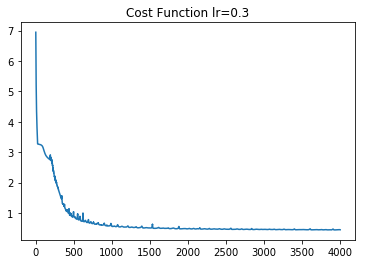

Training Accuracy for 0.3 lr is : 98.91428571428571
Testing Accuracy for 0.3 lr is : 94.0


In [103]:
plt.plot(costMatrix)
plt.title("Cost Function lr=0.3")
plt.show()
TrainAcc=Accuracy(X,H,parameters)
TestAcc=Accuracy(Xtest,Htest,parameters)
print("Training Accuracy for 0.3 lr is :",TrainAcc)
print("Testing Accuracy for 0.3 lr is :",TestAcc)